Workflow of the data science project
1. Decide the problem you need to solve
2. Come up with a hypothesis and decide what data to collect 
3. Collect data
4. EDA
5. Feature Selection and Feature Engineering
6. Train Models
7. Evaluate Models.

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
gender = pd.read_csv("../input/gender_submission.csv")
print("The dimension of the table is: ", train.shape)

['train.csv', 'gender_submission.csv', 'test.csv']
The dimension of the table is:  (891, 12)


The dimesion of the table is (891, 12) which means there are 891 rows and 12 columns in the table. Each row in the table represents a passenger or a member of the crew, each column represents the information for that person which is also known as a variable. 

Variable --- Definition --- Key

survival --- Survival --- 0 = No, 1 = Yes

pclass --- Ticket class --- 1 = 1st, 2 = 2nd, 3 = 3rd

sex --- Sex

Age --- Age in years

sibsp --- # of siblings/spouses aboard the Titanic

parch --- # of parents/children aboard the Titanic

ticket --- Ticket number

fare --- Passenger fare

cabin --- Cabin number

embarked --- Port of Embarkation --- C = Cherbourg, Q = Queenstown, S = Southamption


pclass: A proxy for socio-economic status (SEC)
1st = Upper
2nd = Middle
3rd = Lower

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What do variables looks like ?

1. Numerical - PassengerId, Age, SibSp, Parch, Fare
2. Categorical - Survived, Pclass, Sex, Cabin, Embarked
3. Text data - Name, Ticket

There are missing values which are represented by 'NaN'
Target variable is "Survived"

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical variables include mean, standard deviation, minimum value, different percentile of the data. 

In [18]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,347082,B96 B98,S
freq,1,577,7,4,644


Categorical variables include count, unique, top and freq

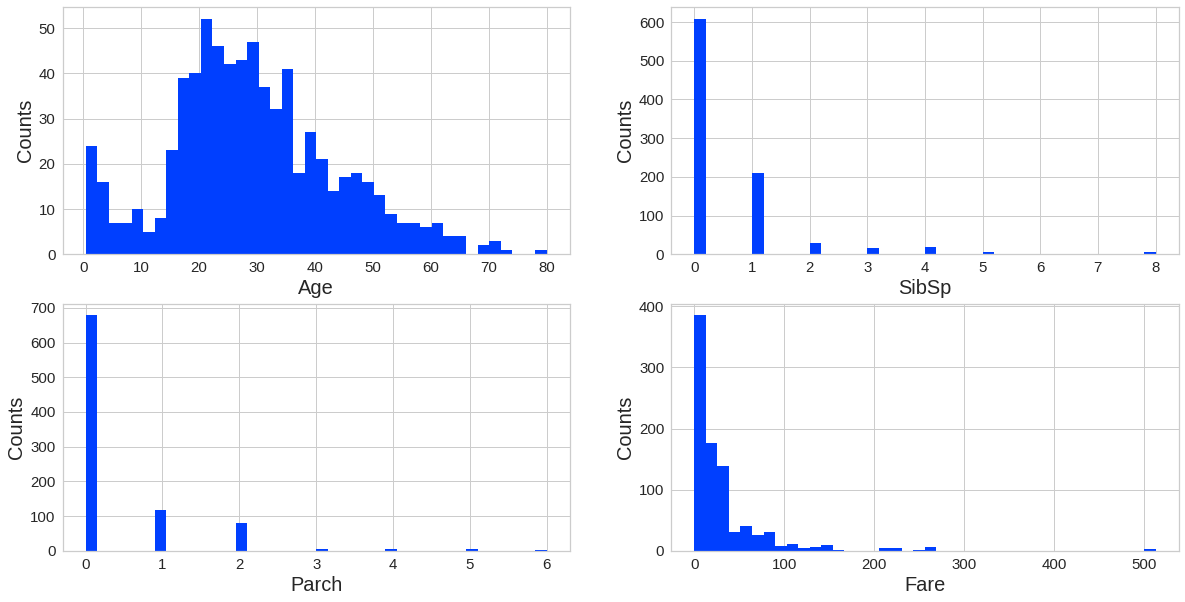

In [19]:
# import visualization packages
import matplotlib.pyplot as plt

# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Make Subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(train[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

Age - 15 - 40 yrs age old
Sibsp - 0 
Parch - 0
Fare - Less than 60

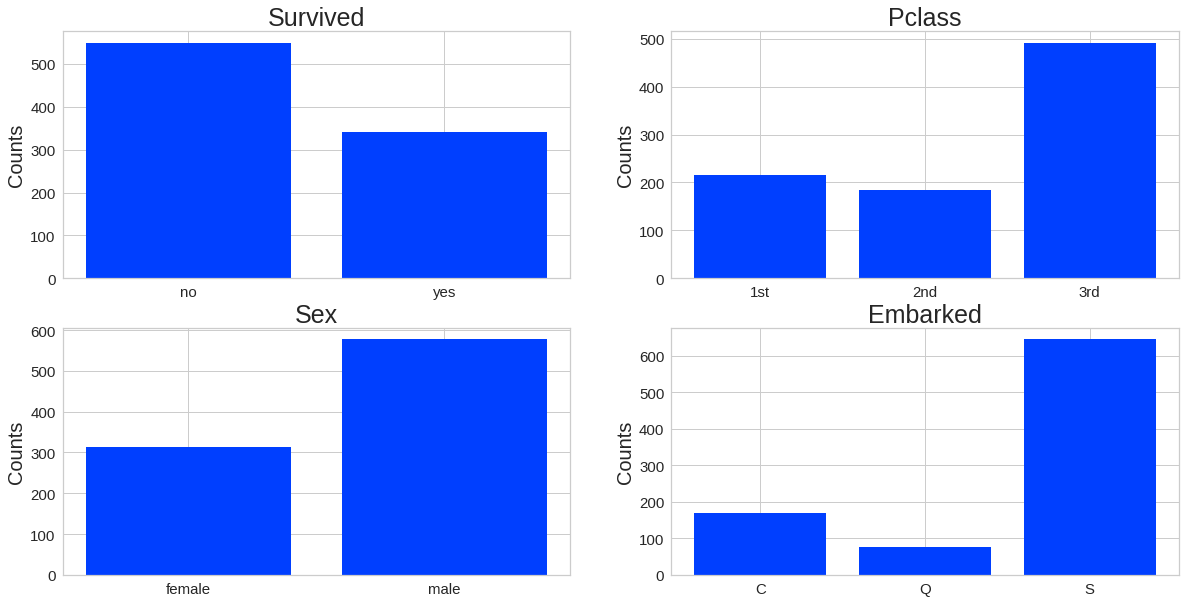

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data read to feed into the visualizer
X_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

X_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = train.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = train.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

Are Numerical Variables Correlated?

- Correlation Coefficient - is a numerical measure of some type of correlation, meaning a statistical relationship between two variables. The variables may be two columns of a given data set of observations, often called a sample, or two components of a multivariate random variable with a known distribution. 

- Assume values in the range from -1 to +1 where +1 indicates the stronges possible agreement and -1 the stronges possible disagreement. 

Types:
1. Pearson - measure of the strength and direction of the linear relationship between two variables that is defined as the covariance of the variables divided by the product of their standard deviations. 
2. Intra-class - is a descriptive statistic that can be used when quantitative measurements are made on units that are organized into groups; it describes how strongly units in the same group resemble each other
3. Rank - measure of the relationship between the rankings of two variables or two rankings of the same variable

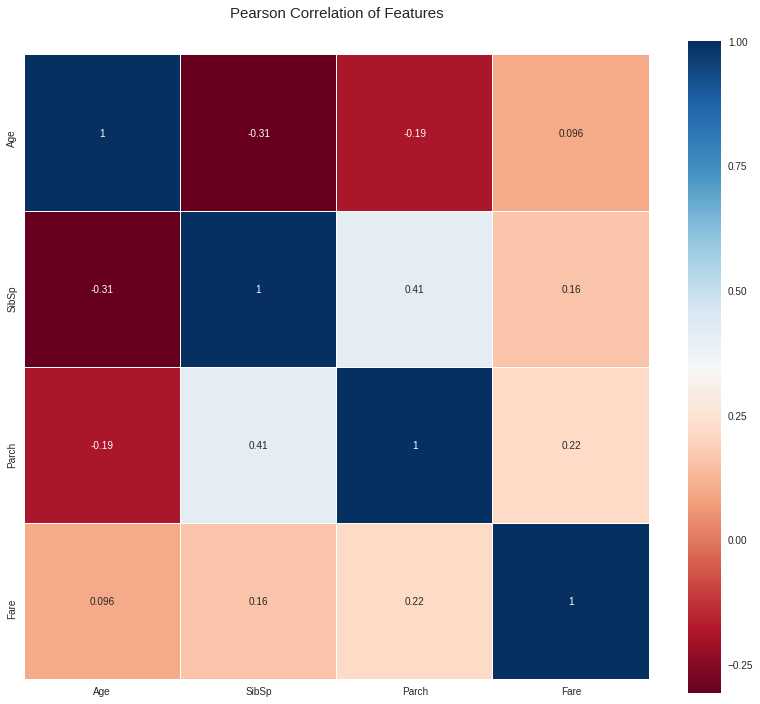

In [21]:
# Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train[num_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

The correlation between numerical variable is low i.e., less that 0.5

Are the distribution of numerical variables the same or different among survived and not survived?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


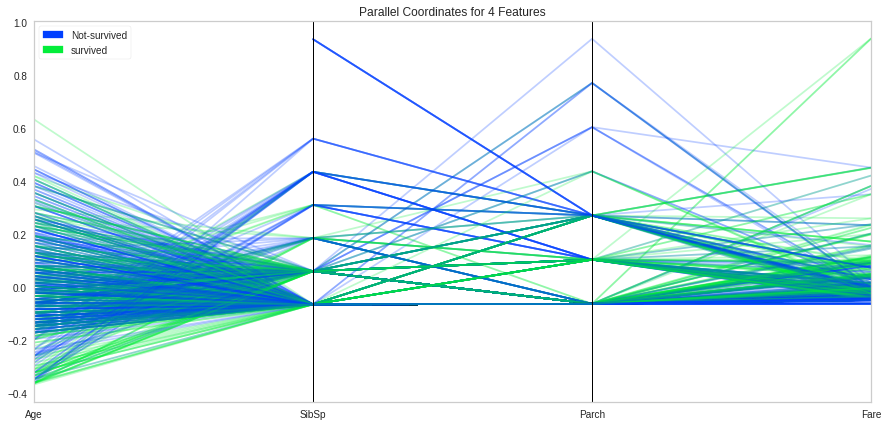

In [22]:
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 50

# Setup the color for yellowbrick visualizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Copy data to a new dataframe
data_norm = train.copy()
# Normalize data to 0 - 1 range
for feature in num_features:
    data_norm[feature] = (train[feature] - train[feature].mean(skipna=True))/(train[feature].max(skipna=True) - train[feature].min(skipna=True))
    
# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = train.Survived.as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes = classes, features = num_features)

# Fir the data to the visualizer
visualizer.fit(X,y)

# Transform the data
visualizer.transform(X)

# Draw/Show/Poof the data
visualizer.poof()
    

* Passengers with more siblings have a higher death rate. 
* Passengers that paid a higher fare had a higher survival rate.

Are there diffferent survival rates in different categories?


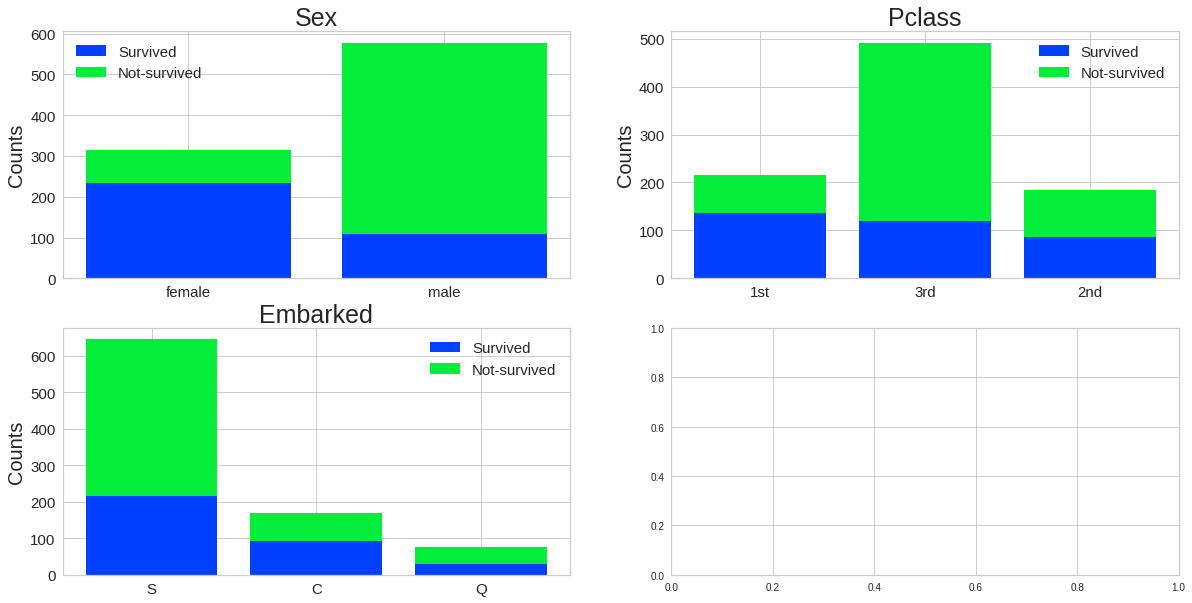

In [23]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==1]['Sex'].value_counts()
Sex_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visulizer
Pclass_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[train['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[train['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visulizer
Embarked_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[train['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

More females survived than men and death rates in the 3rd ticket class and the embarkation from Southampton port are much higher than the others.

Feature Selection and Feature Engineeing
* Drop some features
* Fill in missing values
* Log transformations
* One hot encoding for categorical features

Drop Features:
We will deleted the features "PassengerId", "Name", "Ticket" and "Cabin" from our model. 
Reasons are
1. "PassengerId": Just a series of numbers from 1 - 891 which is used to label each person. 
2. "Name": the names of all the passengers, which might give some information like if there are some people are related based on the last name. But to simplify things up at this stage. This can be removed.
3. "Ticket" and "Cabin": too many levels with unknown information.

Filling in Missing Values
From EDA, "Age", "Cabin" and "Embarked" variables are missing. "Cabin" will not be used. 
* Filling missing values in "Age" with median age.
* Filling missing values in "Embarked" with "S"

In [24]:
# fill the missing age data with median value
def fill_na_median(train, inplace=True):
    return train.fillna(train.median(), inplace=inplace)

fill_na_median(train['Age'])

# check the result
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
# fill with the most represented value
def fill_na_most(train, inplace=True):
    return train.fillna('S', inplace=inplace)

fill_na_most(train['Embarked'])

# check the result
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

Log Transformations of the fare

From the histograms, "Fare" is right-skewed. Log-transformation, so the skewness will be less. Since, the minimum is 0, we will add 1 to the raw value, so there will not be any errors when using log-transformation.

Datasets can be classified into 3 categories that describe the shape of the data distribution: symmetric, left skewed, right skewed. We can use this classification for any data set, but here we will look only at distributions with one peak. Most of the data distributions that you have seen so far have only one peak. Distributions with one peak are called unimodal distributions. Unimodal literally means having one mode. 

Symmetric distributions: A symmetric distribution is one where the left and right hand sides of the distribution are roughly equally balanced around the mean. The histogram below shows a typical symmetric distribution. 

For symmetric distributions, the mean is approximately equal to the median. The tails of the distributions are the parts to the left and to the righ, away from the mean. The tails is the part where the counts in the histogram become smaller. For a symmetric distribution, the left and right tails are equally balanced, meaning that they have about the same length. Another property of a symmetric distribution is that its median lies in the middle of its first and third quartiles. Note that the whiskers of the plot (the minimum and maximum_ do not have to be equally far away from the median. In the next section on outliers, you will see that the minimum and maximum values do not necessarily match the rest of the data distribution well. 

Skewed: A distribution that is skewed right (also known as positively skewed). For a right skewed distribution, the mean is typically greater than the median. Also notice that the tail of the distribution on the right hand (positive side) is longer than on the left hand side.

From the box and whisker diagram we can also see that the median is close to the first quartile than the third quartile. The fact that the right hand side tail of the distribution is longer than the left can also be seen. 

A distribution that is skewed left has exactly the opposite characteristics of one that is skewed right:
* the mean is typically less than the median
* the tails of the distribution is longer on the left hand side than on the right hand side
* the median is closer to the third quartile than to the first quartile. 

In [27]:
# Log Transformation of the fare
import numpy as np

def log_transformation(train):
    return train.apply(np.log1p)

train['Fare_log1p'] = log_transformation(train['Fare'])

# Check the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


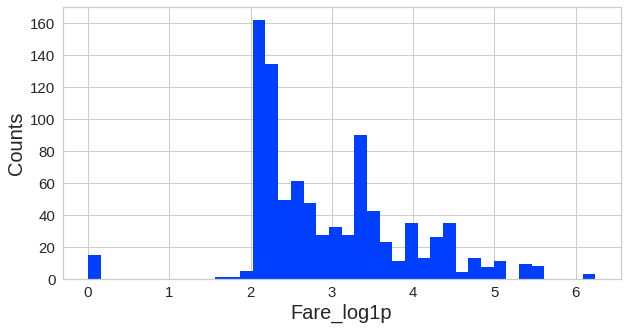

In [28]:
# Check the distribution using histogram
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(train['Fare_log1p'], bins = 40)
plt.xlabel('Fare_log1p', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)


One Hot Encoding

In [31]:
# Get the categorical data
cat_features = ['Pclass', 'Sex', 'Embarked']
data_cat = train[cat_features]
train_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

# One Hot Encoding
data_cat_dummies = pd.get_dummies(data_cat)

# Check the data
data_cat_dummies.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1


Model training and Model Evaluation

First the data set is split into training and validation. We will use the training dataset to train the model and use the validation dataset to evaluate the model. 

In [33]:
# Create a whole features dataset that can be used for train and validation data splitting
# Here we will combine the numerical features and the dummy features together

features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([train[features_model], data_cat_dummies], axis=1)

# Create a whole target dataset that can be used for train and validation data splitting
data_model_y = train.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

# Separate data into training and validation and check the details of the datasets

# import packages
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size = 0.3, random_state = 11)

# Number of samples in each set
print("No of samples in training set:", X_train.shape[0])
print("No of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No of survived and not-survived in the validation set:')
print(y_val.value_counts())

No of samples in training set: 623
No of samples in validation set: 268


No of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


Model training and evaluation 

I will be using logistic regression as the purpose of this project is to predict if a passenger has survived or not. This is said to be a classification problem. The evaluation metrics you can use to evaluate your model for classifiation problem are
1. Confusion Matrix
2. Precision
3. Recall
4. F1 score
5. ROC curve

Confusion Matrix: 


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


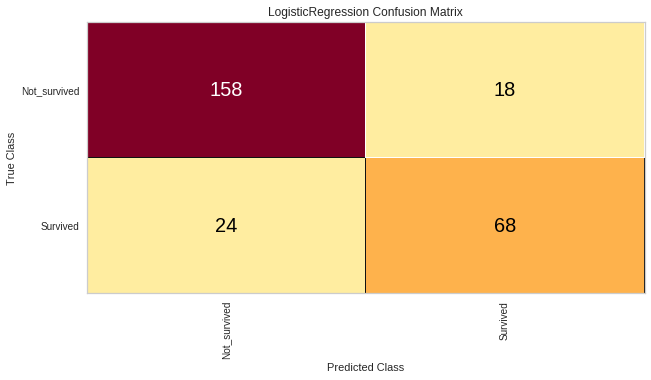

In [34]:
# Confusion Matrix

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

# The confusion matrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes = classes, percent = False)

# Fits the passes model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the Confusion Matrix, we need some test data. 
# Score runs predict() on the data and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()


From the confusion matrix, acuracy of the model is (158+68)/(158+24+18+68) = 84.33% which is higher than random guess which is 50%. If you use majority guess, the accuracy will be a little higher which is 176/268 = 65.67%, but stil lower than our model. It seems like our model worked pretty well which means we should use a machine learning model to predict who survived in this instance. 

Precision, Recall and F1 score
We can also visually generate a classification report, which includes precision, recall and F1 score for our classification model. 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


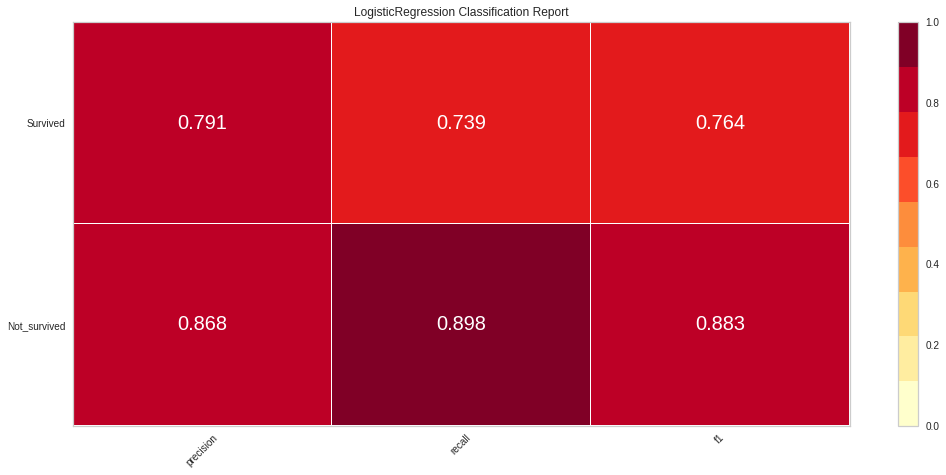

In [35]:
# Set the size of the figue and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes = classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw/Show/Poof the data
g = visualizer.poof()

ROC Curve and AIC

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


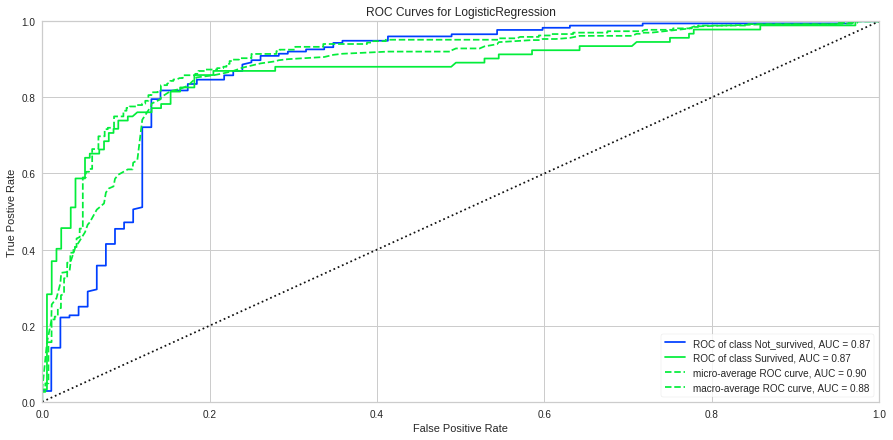

In [36]:
# Instantiate the visualizer
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


In the ROC Curve above, the dotted diagonal line in the pictures shows when the result is randomly guessed. A good model should be above that line.